# Beyond 16S rRNA: Identifying Alternative Marker Genes for Strain-Level Differentiation in Vibrio splendidus

This Jupyter notebook produces plots utilizing data from the csvs created in vibrio-analysis.ipynb.

Author: Kiley Huffman

Lab: Schwartzman Lab

Date Initiated: 6/6/2025

In [41]:
# Required Modules: Load at the start of each session
import pandas as pd
import matplotlib.pyplot as plt

# Figure 1: Normalized Perfect Match Rate vs. Average % Identity

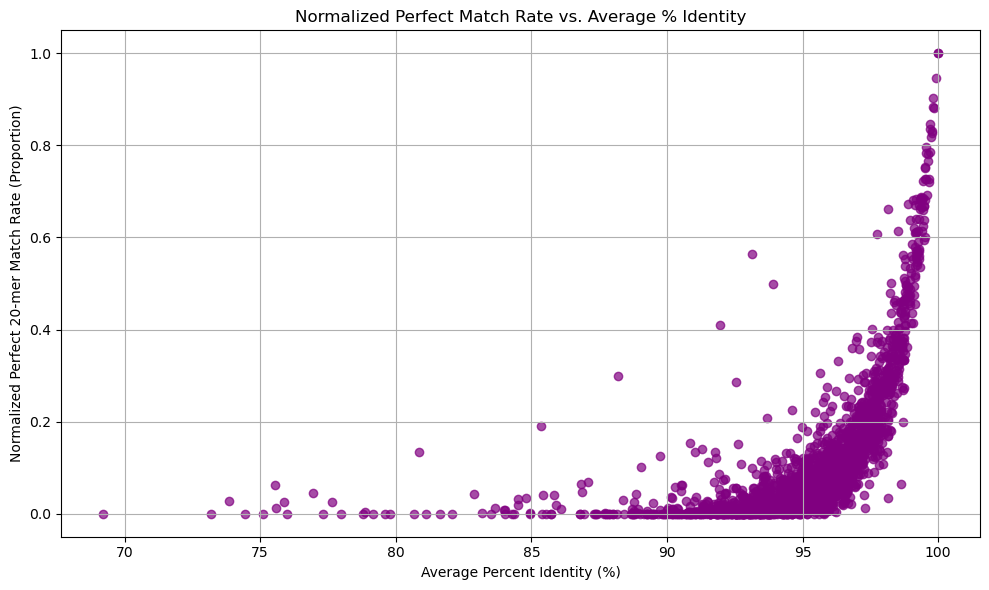

In [44]:
# Extract values from df
df = pd.read_csv("csvs/alignment_stats.csv")

# Calculate average percent identity 
df["avg_percent_identity"] = (df["mean_zeroes"] / 80) * 100

# Plot the data 
plt.figure(figsize=(10, 6))
plt.scatter(df["avg_percent_identity"], df["normalized_perfect_match_rate"], color='purple', alpha=0.7)
plt.xlabel("Average Percent Identity (%)")
plt.ylabel("Normalized Perfect 20-mer Match Rate (Proportion)")
plt.title("Normalized Perfect Match Rate vs. Average % Identity")
plt.grid(True)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('figures/figure1.png', dpi=300, bbox_inches='tight')
plt.show()

# Figure 2: Histogram of Alignment Lengths

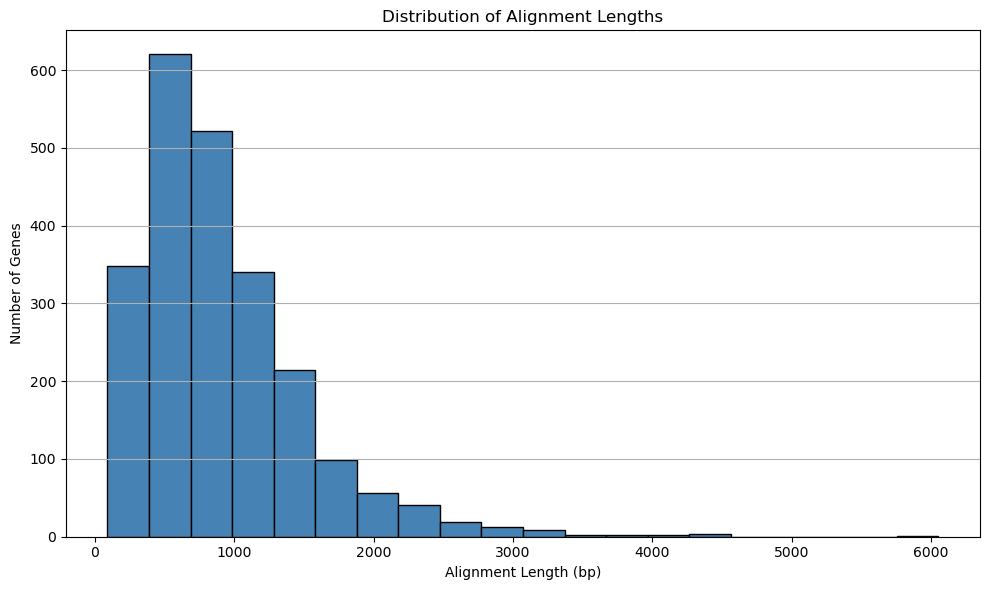

In [48]:
# Extract values from df
df = pd.read_csv("csvs/alignment_stats.csv")

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df["alignment_length"], bins=20, color='steelblue', edgecolor='black')
plt.xlabel("Alignment Length (bp)")
plt.ylabel("Number of Genes")
plt.title("Distribution of Alignment Lengths")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('figures/figure2.png', dpi=300, bbox_inches='tight')
plt.show()

# Figure 3: Mean Zero Counts vs. Variance in Conservation 

Highlight the marker genes that have been previously used for strain-differentiation: gyrB (GC_00001281), hsp60 (GC_00002298), and rpoB (GC_00002774). Also highlight the genes we have identified suitable for strain differentiation and primer design: metC0 (GC_00002229) and  ftsY (GC_00002632).


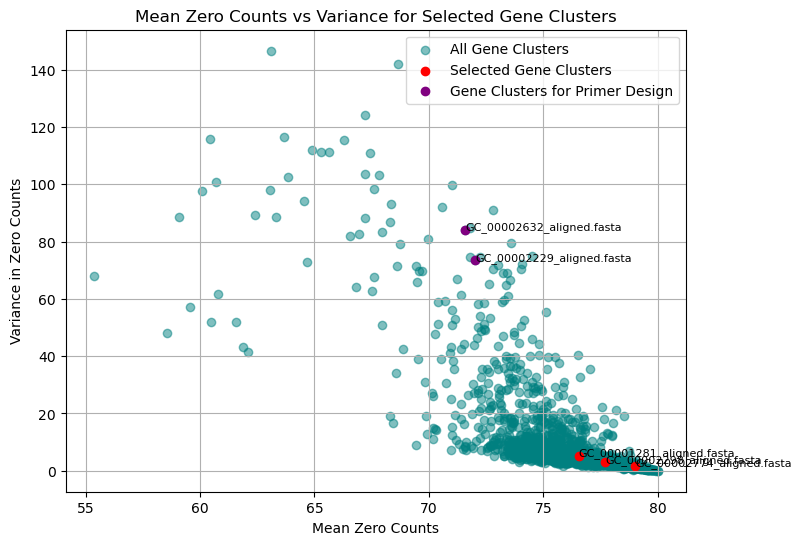

In [66]:
# Load CSV
df = pd.read_csv("csvs/alignment_stats.csv")

# List of GCs to plot
target_GCs = [
    'GC_00000267_aligned.fasta', 'GC_00001281_aligned.fasta', 'GC_00002774_aligned.fasta', 'GC_00002298_aligned.fasta',
    'GC_00000113_aligned.fasta', 'GC_00007229_aligned.fasta', 'GC_00007467_aligned.fasta', 'GC_00007973_aligned.fasta',
    'GC_00008514_aligned.fasta', 'GC_00008665_aligned.fasta'
]

# Filter the dataframe for these GCs
filtered_df = df[df['filename'].isin(target_GCs)]

# Plot all points in teal
plt.figure(figsize=(8,6))
plt.scatter(df["mean_zeroes"], df["variance_zeroes"], color='teal', alpha=0.5, label='All Gene Clusters')

# Highlight selected points in red
plt.scatter(filtered_df['mean_zeroes'], filtered_df['variance_zeroes'], color='red', label='Selected Gene Clusters')

# Highlight chosen gene clusters for primer-design in purple
chosen_gc = ['GC_00002229_aligned.fasta', 'GC_00002632_aligned.fasta']
chosen_df = df[df['filename'].isin(chosen_gc)]
plt.scatter(chosen_df['mean_zeroes'], chosen_df['variance_zeroes'], color='purple', label='Gene Clusters for Primer Design')

# Add labels for gene clusters for primer-design
for i, row in chosen_df.iterrows():
    plt.text(row['mean_zeroes'], row['variance_zeroes'], row['filename'], fontsize=8)

# Add labels for selected GCs
for i, row in filtered_df.iterrows():
    plt.text(row['mean_zeroes'], row['variance_zeroes'], row['filename'], fontsize=8)

# Plot the data
plt.title('Mean Zero Counts vs Variance for Selected Gene Clusters')
plt.xlabel('Mean Zero Counts')
plt.ylabel('Variance in Zero Counts')
plt.legend()
plt.legend()
plt.grid(True)
plt.savefig('figures/figure3.png', dpi=300, bbox_inches='tight')
plt.show()